In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
df_original = pd.DataFrame(x)
#df_y = pd.DataFrame(y)
#df_y = df_y.astype(float)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
df_2feature


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns]

In [3]:
#data augmentation(bootsrap by sampling)
subset = df_2feature.sample(frac=2,replace=True,random_state=1)
subset

0    1  2
37   4.9  3.6  0
140  6.7  3.1  2
72   6.3  2.5  1
137  6.4  3.1  2
133  6.3  2.8  2
..   ...  ... ..
80   5.5  2.4  1
27   5.2  3.5  0
72   6.3  2.5  1
28   5.2  3.4  0
130  7.4  2.8  2

[300 rows x 3 columns]

In [4]:
df_2feature = df_2feature.append(subset,ignore_index=True)
df_2feature_original = df_2feature
print(df_2feature_original)
print(df_2feature)

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
445  5.5  2.4  1
446  5.2  3.5  0
447  6.3  2.5  1
448  5.2  3.4  0
449  7.4  2.8  2

[450 rows x 3 columns]
       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
445  5.5  2.4  1
446  5.2  3.5  0
447  6.3  2.5  1
448  5.2  3.4  0
449  7.4  2.8  2

[450 rows x 3 columns]


In [5]:
#add bounded error into data
subset = df_2feature.sample(frac=0.5,replace=True,random_state=1)

for idx,cell in subset[0].iteritems() :
    r = rd.uniform(-0.3,0.3)
    subset[0][idx] += r
    
df_2feature = df_2feature.append(subset,ignore_index=True)
df_2feature


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

0    1  2
0    5.100000  3.5  0
1    4.900000  3.0  0
2    4.700000  3.2  0
3    4.600000  3.1  0
4    5.000000  3.6  0
..        ...  ... ..
670  6.107251  3.2  1
671  5.324636  3.4  0
672  4.527121  3.2  0
673  5.493613  4.0  0
674  5.734217  2.9  1

[675 rows x 3 columns]

In [6]:
#450 data with only data augmentaion
x_original = df_2feature_original.iloc[: , :-1]
y_original = df_2feature_original.iloc[:,-1]
#675 data with bounded error value and augmentation
x_be = df_2feature.iloc[:, :-1]
y_be = df_2feature.iloc[:,-1]
#original
X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)

#BE
X_train, X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)

clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)

print('BESVM Accuracy (on training) = '+str(result_BE_train))
print('BESVM Accuracy (on testing) = '+str(result_BE_test))
print("==========================================")
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))


BESVM Accuracy (on training) = 0.774074074074074
BESVM Accuracy (on testing) = 0.7925925925925926
Original Accuracy (on training) = 0.7916666666666666
Original Accuracy (on testing) = 0.7777777777777778


Flow : 
df_original(150 x 4) -> augmentaionI(450 x 4)
1.orginal svm (450 x 4)
2.1.augmentaionII with error in feature X1(675 x 4)
2.2.augmentaionII with error in feature X2(675 x 4)
.
.
.
2.15.augmentaionII with error in feature X1X2X3X4(675 x 4)

In [7]:
df_original[4] = y
#augmentation
subset = df_original.sample(frac=2,replace=True,random_state=1)
df_original_augmentation = df_original
df_original_augmentation = df_original_augmentation.append(subset,ignore_index=True)
df_original_augmentation

0    1    2    3  4
0    5.1  3.5  1.4  0.2  0
1    4.9  3.0  1.4  0.2  0
2    4.7  3.2  1.3  0.2  0
3    4.6  3.1  1.5  0.2  0
4    5.0  3.6  1.4  0.2  0
..   ...  ...  ...  ... ..
445  5.5  2.4  3.8  1.1  1
446  5.2  3.5  1.5  0.2  0
447  6.3  2.5  4.9  1.5  1
448  5.2  3.4  1.4  0.2  0
449  7.4  2.8  6.1  1.9  2

[450 rows x 5 columns]

In [8]:
df_original_augmentation.columns = ['x1','x2','x3','x4','y']
df_original.columns = ['x1','x2','x3','x4','y']
df_original_augmentation

x1   x2   x3   x4  y
0    5.1  3.5  1.4  0.2  0
1    4.9  3.0  1.4  0.2  0
2    4.7  3.2  1.3  0.2  0
3    4.6  3.1  1.5  0.2  0
4    5.0  3.6  1.4  0.2  0
..   ...  ...  ...  ... ..
445  5.5  2.4  3.8  1.1  1
446  5.2  3.5  1.5  0.2  0
447  6.3  2.5  4.9  1.5  1
448  5.2  3.4  1.4  0.2  0
449  7.4  2.8  6.1  1.9  2

[450 rows x 5 columns]

In [9]:
print(df_original_augmentation['x1'].mean(),df_original_augmentation['x2'].mean(),
df_original_augmentation['x3'].mean(),
df_original_augmentation['x4'].mean())

5.849111111111112 3.059111111111111 3.7711111111111113 1.2197777777777776


In [10]:
box = ['x1','x2','x3','x4']
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

x_original = df_original_augmentation.iloc[: , :-1].values
y_original = df_original_augmentation.iloc[:,-1].values
X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('===============================================')

for i in box :
    for idx,cell in subset[i].iteritems():
        #r = rd.uniform(-0.3,0.3)
        r = rd.uniform(-(df_original_augmentation[i].mean()*0.1),df_original_augmentation[i].mean()*0.1)
        subset[i][idx] += r
    df_BE = df_original_augmentation.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   

    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



Original Accuracy (on training) = 0.9777777777777777
Original Accuracy (on testing) = 0.9666666666666667
BESVM Accuracy (on training) = x1with bounded error :0.975925925925926
BESVM Accuracy (on testing) = x1with bounded error :0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x2with bounded error :0.9722222222222222
BESVM Accuracy (on testing) = x2with bounded error :0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x3with bounded error :0.9685185185185186
BESVM Accuracy (on testing) = x3with bounded error :0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x4with bounded error :0.9666666666666667
BESVM Accuracy (on testing) = x4with bounded error :0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [11]:
#add error into two features
b = list(itertools.combinations(box,2))
resultlist = []
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

print('===============================================')
for i in b :
    tempa = i[0]
    tempb = i[1]
    for idx,cell in subset[tempa].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        ra = rd.uniform(-(df_original_augmentation[tempa].mean()*0.1),df_original_augmentation[tempa].mean()*0.1)
        subset[tempa][idx] += ra
    for idx,cell in subset[tempb].iteritems():
        rb = rd.uniform(-(df_original_augmentation[tempb].mean()*0.1),df_original_augmentation[tempb].mean()*0.1)
        subset[tempb][idx] += rb
    df_BE = df_BE.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    
    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x2')with bounded error :0.975925925925926
BESVM Accuracy (on testing) = ('x1', 'x2')with bounded error :0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x3')with bounded error :0.9791666666666666
BESVM Accuracy (on testing) = ('x1', 'x3')with bounded error :0.9777777777777777


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x4')with bounded error :0.9822222222222222
BESVM Accuracy (on testing) = ('x1', 'x4')with bounded error :0.9644444444444444


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = ('x2', 'x3')with bounded error :0.975925925925926
BESVM Accuracy (on testing) = ('x2', 'x3')with bounded error :0.9740740740740741


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x2', 'x4')with bounded error :0.973015873015873
BESVM Accuracy (on testing) = ('x2', 'x4')with bounded error :0.9714285714285714


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x3', 'x4')with bounded error :0.9743055555555555
BESVM Accuracy (on testing) = ('x3', 'x4')with bounded error :0.9722222222222222


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [12]:
#add error into three features
b = list(itertools.combinations(box,3))
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

print('===============================================')
for i in b :
    tempa = i[0]
    tempb = i[1]
    tempc = i[2]
    for idx,cell in subset[tempa].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        ra = rd.uniform(-(df_original_augmentation[tempa].mean()*0.1),df_original_augmentation[tempa].mean()*0.1)
        subset[tempa][idx] += ra
    for idx,cell in subset[tempb].iteritems():
        rb = rd.uniform(-(df_original_augmentation[tempb].mean()*0.1),df_original_augmentation[tempb].mean()*0.1)
        subset[tempb][idx] += rb
    for idx,cell in subset[tempc].iteritems():
        rc = rd.uniform(-(df_original_augmentation[tempc].mean()*0.1),df_original_augmentation[tempc].mean()*0.1)
        subset[tempc][idx] += rc
    df_BE = df_BE.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    
    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x2', 'x3')with bounded error :0.9740740740740741
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3')with bounded error :0.9703703703703703


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = ('x1', 'x2', 'x4')with bounded error :0.9777777777777777
BESVM Accuracy (on testing) = ('x1', 'x2', 'x4')with bounded error :0.9833333333333333


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x3', 'x4')with bounded error :0.98
BESVM Accuracy (on testing) = ('x1', 'x3', 'x4')with bounded error :0.96


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = ('x2', 'x3', 'x4')with bounded error :0.9731481481481481
BESVM Accuracy (on testing) = ('x2', 'x3', 'x4')with bounded error :0.9592592592592593


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [13]:
#add error into four features
b = list(itertools.combinations(box,4))
resultlist = []
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

print('===============================================')
for i in b :
    tempa = i[0]
    tempb = i[1]
    tempc = i[2]
    tempd = i[3]
    for idx,cell in subset[tempa].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        ra = rd.uniform(-(df_original_augmentation[tempa].mean()*0.1),df_original_augmentation[tempa].mean()*0.1)
        subset[tempa][idx] += ra
    for idx,cell in subset[tempb].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        rb = rd.uniform(-(df_original_augmentation[tempb].mean()*0.1),df_original_augmentation[tempb].mean()*0.1)
        subset[tempb][idx] += rb
    for idx,cell in subset[tempc].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        rc = rd.uniform(-(df_original_augmentation[tempc].mean()*0.1),df_original_augmentation[tempc].mean()*0.1)
        subset[tempc][idx] += rc
    for idx,cell in subset[tempd].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        r_d = rd.uniform(-(df_original_augmentation[tempd].mean()*0.1),df_original_augmentation[tempd].mean()*0.1)
        subset[tempd][idx] += r_d
        
    df_BE = df_BE.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    
    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

BESVM Accuracy (on training) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9722222222222222
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9777777777777777


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Original Accuracy (on training) = 0.9777777777777777
Original Accuracy (on testing) = 0.9666666666666667

===============================================
one feature with error bounded in 10%

BESVM Accuracy (on training) = x1 with bounded error :0.9777777777777777
BESVM Accuracy (on testing) = x1 with bounded error :0.9851851851851852

BESVM Accuracy (on training) = x2 with bounded error :0.975925925925926
BESVM Accuracy (on testing) = x2 with bounded error :0.9851851851851852

BESVM Accuracy (on training) = x3 with bounded error :0.9777777777777777
BESVM Accuracy (on testing) = x3 with bounded error :0.9851851851851852

BESVM Accuracy (on training) = x4 with bounded error :0.975925925925926
BESVM Accuracy (on testing) = x4 with bounded error :0.9851851851851852

===============================================
two feature with error bounded in 10%

BESVM Accuracy (on training) = ('x1', 'x2')with bounded error :0.9740740740740741
BESVM Accuracy (on testing) = ('x1', 'x2')with bounded error :0.9851851851851852

BESVM Accuracy (on training) = ('x1', 'x3')with bounded error :0.9763888888888889
BESVM Accuracy (on testing) = ('x1', 'x3')with bounded error :0.9666666666666667

BESVM Accuracy (on training) = ('x1', 'x4')with bounded error :0.97
BESVM Accuracy (on testing) = ('x1', 'x4')with bounded error :0.9644444444444444

BESVM Accuracy (on training) = ('x2', 'x3')with bounded error :0.9685185185185186
BESVM Accuracy (on testing) = ('x2', 'x3')with bounded error :0.9703703703703703

BESVM Accuracy (on training) = ('x2', 'x4')with bounded error :0.969047619047619
BESVM Accuracy (on testing) = ('x2', 'x4')with bounded error :0.9682539682539683

BESVM Accuracy (on training) = ('x3', 'x4')with bounded error :0.9701388888888889
BESVM Accuracy (on testing) = ('x3', 'x4')with bounded error :0.9555555555555556

===============================================
three feature with error bounded in 10%

BESVM Accuracy (on training) = ('x1', 'x2', 'x3')with bounded error :0.9740740740740741
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3')with bounded error :0.9777777777777777

BESVM Accuracy (on training) = ('x1', 'x2', 'x4')with bounded error :0.9763888888888889
BESVM Accuracy (on testing) = ('x1', 'x2', 'x4')with bounded error :0.9722222222222222

BESVM Accuracy (on training) = ('x1', 'x3', 'x4')with bounded error :0.9855555555555555
BESVM Accuracy (on testing) = ('x1', 'x3', 'x4')with bounded error :0.9644444444444444

BESVM Accuracy (on training) = ('x2', 'x3', 'x4')with bounded error :0.9833333333333333
BESVM Accuracy (on testing) = ('x2', 'x3', 'x4')with bounded error :0.9851851851851852

===============================================
four feature with error bounded in 10%

BESVM Accuracy (on training) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9740740740740741
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9851851851851852

Error raised to 20% from here

In [14]:
#adding error to one feature
box = ['x1','x2','x3','x4']
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

x_original = df_original_augmentation.iloc[: , :-1].values
y_original = df_original_augmentation.iloc[:,-1].values
X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('===============================================')

for i in box :
    for idx,cell in subset[i].iteritems():
        #r = rd.uniform(-0.3,0.3)
        r = rd.uniform(-(df_original_augmentation[i].mean()*0.2),df_original_augmentation[i].mean()*0.2)
        subset[i][idx] += r
    df_BE = df_original_augmentation.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   

    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



Original Accuracy (on training) = 0.9777777777777777
Original Accuracy (on testing) = 0.9666666666666667
BESVM Accuracy (on training) = x1with bounded error :0.9777777777777777
BESVM Accuracy (on testing) = x1with bounded error :0.9777777777777777


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x2with bounded error :0.975925925925926
BESVM Accuracy (on testing) = x2with bounded error :0.9777777777777777
BESVM Accuracy (on training) = x3with bounded error :0.9648148148148148
BESVM Accuracy (on testing) = x3with bounded error :0.9629629629629629


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x4with bounded error :0.9555555555555556
BESVM Accuracy (on testing) = x4with bounded error :0.9629629629629629


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [15]:
#add error into two features
b = list(itertools.combinations(box,2))
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

print('===============================================')
for i in b :
    tempa = i[0]
    tempb = i[1]
    for idx,cell in subset[tempa].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        ra = rd.uniform(-(df_original_augmentation[tempa].mean()*0.2),df_original_augmentation[tempa].mean()*0.2)
        subset[tempa][idx] += ra
    for idx,cell in subset[tempb].iteritems():
        rb = rd.uniform(-(df_original_augmentation[tempb].mean()*0.2),df_original_augmentation[tempb].mean()*0.2)
        subset[tempb][idx] += rb
    df_BE = df_BE.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    
    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

BESVM Accuracy (on training) = ('x1', 'x2')with bounded error :0.9740740740740741
BESVM Accuracy (on testing) = ('x1', 'x2')with bounded error :0.9703703703703703


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

BESVM Accuracy (on training) = ('x1', 'x3')with bounded error :0.9680555555555556
BESVM Accuracy (on testing) = ('x1', 'x3')with bounded error :0.9666666666666667


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

BESVM Accuracy (on training) = ('x1', 'x4')with bounded error :0.9611111111111111
BESVM Accuracy (on testing) = ('x1', 'x4')with bounded error :0.9644444444444444


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

BESVM Accuracy (on training) = ('x2', 'x3')with bounded error :0.9629629629629629
BESVM Accuracy (on testing) = ('x2', 'x3')with bounded error :0.9629629629629629


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

BESVM Accuracy (on training) = ('x2', 'x4')with bounded error :0.9555555555555556
BESVM Accuracy (on testing) = ('x2', 'x4')with bounded error :0.9492063492063492


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

BESVM Accuracy (on training) = ('x3', 'x4')with bounded error :0.9486111111111111
BESVM Accuracy (on testing) = ('x3', 'x4')with bounded error :0.95


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [16]:
#add error into three features
b = list(itertools.combinations(box,3))
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

print('===============================================')
for i in b :
    tempa = i[0]
    tempb = i[1]
    tempc = i[2]
    for idx,cell in subset[tempa].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        ra = rd.uniform(-(df_original_augmentation[tempa].mean()*0.2),df_original_augmentation[tempa].mean()*0.2)
        subset[tempa][idx] += ra
    for idx,cell in subset[tempb].iteritems():
        rb = rd.uniform(-(df_original_augmentation[tempb].mean()*0.2),df_original_augmentation[tempb].mean()*0.2)
        subset[tempb][idx] += rb
    for idx,cell in subset[tempc].iteritems():
        rc = rd.uniform(-(df_original_augmentation[tempc].mean()*0.2),df_original_augmentation[tempc].mean()*0.2)
        subset[tempc][idx] += rc
    df_BE = df_BE.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    
    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x2', 'x3')with bounded error :0.9611111111111111
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3')with bounded error :0.9629629629629629


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x2', 'x4')with bounded error :0.9625
BESVM Accuracy (on testing) = ('x1', 'x2', 'x4')with bounded error :0.9444444444444444


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x1', 'x3', 'x4')with bounded error :0.9522222222222222
BESVM Accuracy (on testing) = ('x1', 'x3', 'x4')with bounded error :0.9377777777777778


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = ('x2', 'x3', 'x4')with bounded error :0.9435185185185185
BESVM Accuracy (on testing) = ('x2', 'x3', 'x4')with bounded error :0.9444444444444444


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [17]:
#add error into four features
b = list(itertools.combinations(box,4))
resultlist = []
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

print('===============================================')
for i in b :
    tempa = i[0]
    tempb = i[1]
    tempc = i[2]
    tempd = i[3]
    for idx,cell in subset[tempa].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        ra = rd.uniform(-(df_original_augmentation[tempa].mean()*0.2),df_original_augmentation[tempa].mean()*0.2)
        subset[tempa][idx] += ra
    for idx,cell in subset[tempb].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        rb = rd.uniform(-(df_original_augmentation[tempb].mean()*0.2),df_original_augmentation[tempb].mean()*0.2)
        subset[tempb][idx] += rb
    for idx,cell in subset[tempc].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        rc = rd.uniform(-(df_original_augmentation[tempc].mean()*0.2),df_original_augmentation[tempc].mean()*0.2)
        subset[tempc][idx] += rc
    for idx,cell in subset[tempd].iteritems():
        #ra = rd.uniform(-0.3,0.3)
        r_d = rd.uniform(-(df_original_augmentation[tempd].mean()*0.2),df_original_augmentation[tempd].mean()*0.2)
        subset[tempd][idx] += r_d
        
    df_BE = df_BE.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    
    print('BESVM Accuracy (on training) = '+str(i)+'with bounded error :'+str(result_BE_train))
    print('BESVM Accuracy (on testing) = '+str(i)+'with bounded error :'+str(result_BE_test))
    print("==========================================")



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

BESVM Accuracy (on training) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9611111111111111
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9555555555555556


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/


Original Accuracy (on training) = 0.9777777777777777
Original Accuracy (on testing) = 0.9666666666666667

Error bounded in 20% :

BESVM Accuracy (on training) = x1with bounded error :0.9777777777777777
BESVM Accuracy (on testing) = x1with bounded error :0.9851851851851852

BESVM Accuracy (on training) = x2with bounded error :0.9777777777777777
BESVM Accuracy (on testing) = x2with bounded error :0.9777777777777777

BESVM Accuracy (on training) = x3with bounded error :0.9685185185185186
BESVM Accuracy (on testing) = x3with bounded error :0.9629629629629629

BESVM Accuracy (on training) = x4with bounded error :0.9648148148148148
BESVM Accuracy (on testing) = x4with bounded error :0.9777777777777777

===============================================

BESVM Accuracy (on training) = ('x1', 'x2')with bounded error :0.9629629629629629
BESVM Accuracy (on testing) = ('x1', 'x2')with bounded error :0.9777777777777777

BESVM Accuracy (on training) = ('x1', 'x3')with bounded error :0.9666666666666667
BESVM Accuracy (on testing) = ('x1', 'x3')with bounded error :0.9611111111111111

BESVM Accuracy (on training) = ('x1', 'x4')with bounded error :0.9644444444444444
BESVM Accuracy (on testing) = ('x1', 'x4')with bounded error :0.9688888888888889

BESVM Accuracy (on training) = ('x2', 'x3')with bounded error :0.9666666666666667
BESVM Accuracy (on testing) = ('x2', 'x3')with bounded error :0.9740740740740741

BESVM Accuracy (on training) = ('x2', 'x4')with bounded error :0.9619047619047619
BESVM Accuracy (on testing) = ('x2', 'x4')with bounded error :0.9619047619047619

BESVM Accuracy (on training) = ('x3', 'x4')with bounded error :0.9569444444444445
BESVM Accuracy (on testing) = ('x3', 'x4')with bounded error :0.9777777777777777

===============================================

BESVM Accuracy (on training) = ('x1', 'x2', 'x3')with bounded error :0.9703703703703703
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3')with bounded error :0.9777777777777777

BESVM Accuracy (on training) = ('x1', 'x2', 'x4')with bounded error :0.9652777777777778
BESVM Accuracy (on testing) = ('x1', 'x2', 'x4')with bounded error :0.9722222222222222

BESVM Accuracy (on training) = ('x1', 'x3', 'x4')with bounded error :0.9688888888888889
BESVM Accuracy (on testing) = ('x1', 'x3', 'x4')with bounded error :0.96

BESVM Accuracy (on training) = ('x2', 'x3', 'x4')with bounded error :0.962037037037037
BESVM Accuracy (on testing) = ('x2', 'x3', 'x4')with bounded error :0.9629629629629629

===============================================

BESVM Accuracy (on training) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9592592592592593
BESVM Accuracy (on testing) = ('x1', 'x2', 'x3', 'x4')with bounded error :0.9777777777777777



1.Using the same degree of error on each combination of x1 x2 x3 x4 and train SVM above
2.Addinng different degree of error on same feature and train SVM below
3.Try feature1 and 2 first


Original Accuracy (on training) = 0.9777777777777777
Original Accuracy (on testing) = 0.9666666666666667


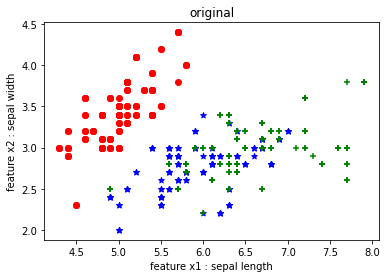

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x1 with bounded error0.1 : 0.975925925925926
BESVM Accuracy (on testing) = x1 with bounded error0.1 : 0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


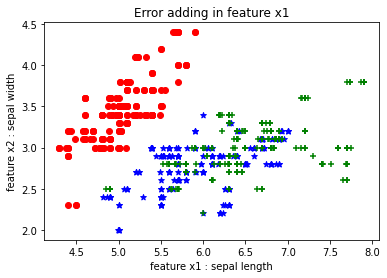

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x1 with bounded error0.2 : 0.9777777777777777
BESVM Accuracy (on testing) = x1 with bounded error0.2 : 0.9851851851851852


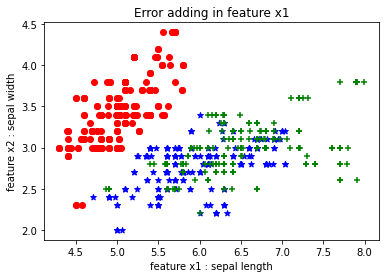

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x1 with bounded error0.3 : 0.9722222222222222
BESVM Accuracy (on testing) = x1 with bounded error0.3 : 0.9851851851851852


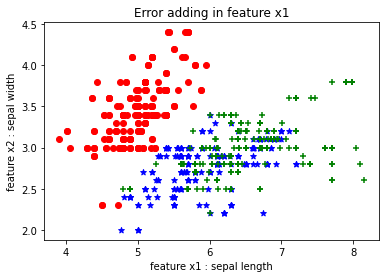

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x1 with bounded error0.4 : 0.9666666666666667
BESVM Accuracy (on testing) = x1 with bounded error0.4 : 0.9851851851851852


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

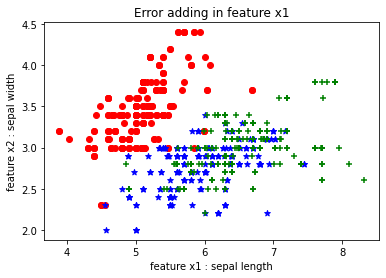

In [18]:
#add different error degree in feature x1
box = [0.1,0.2,0.3,0.4]
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

x_original = df_original_augmentation.iloc[: , :-1].values
y_original = df_original_augmentation.iloc[:,-1].values
X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.scatter(x_original[y_original==2,0],x_original[y_original==2,1],color = 'g',marker = '+')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()
print('===============================================')

for i in box :
    for idx,cell in subset['x1'].iteritems():
        #r = rd.uniform(-0.3,0.3)
        for j in range(20) :
            r += rd.uniform(-(df_original_augmentation['x1'].mean()*i),df_original_augmentation['x1'].mean()*i)
        r =r/20
        subset['x1'][idx] += r
    df_BE = df_original_augmentation.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    x_scatter = x_be[:,:2]

    print('BESVM Accuracy (on training) = x1 with bounded error'+str(i)+ ' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = x1 with bounded error'+str(i)+ ' : '+str(result_BE_test))
    plt.scatter(x_scatter[y_be==0,0],x_scatter[y_be==0,1],color = 'r',marker = 'o')
    plt.scatter(x_scatter[y_be==1,0],x_scatter[y_be==1,1],color = 'b',marker = '*')
    plt.scatter(x_scatter[y_be==2,0],x_scatter[y_be==2,1],color = 'g',marker = '+')
    plt.title('Error adding in feature x1')
    plt.xlabel('feature x1 : sepal length')
    plt.ylabel('feature x2 : sepal width')
    plt.show()
    print("==========================================")



In [19]:
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
#from sklearn import tree
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#圖形中文顯示處理


Original Accuracy (on training) = 0.9777777777777777
Original Accuracy (on testing) = 0.9666666666666667


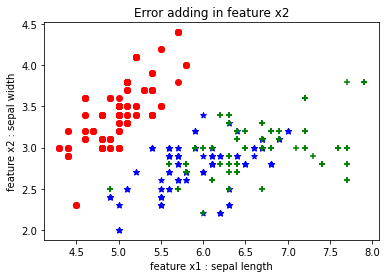

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x2 with bounded error0.1 : 0.975925925925926
BESVM Accuracy (on testing) = x2 with bounded error0.1 : 0.9851851851851852


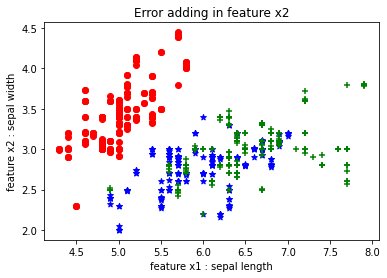

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x2 with bounded error0.2 : 0.975925925925926
BESVM Accuracy (on testing) = x2 with bounded error0.2 : 0.9851851851851852


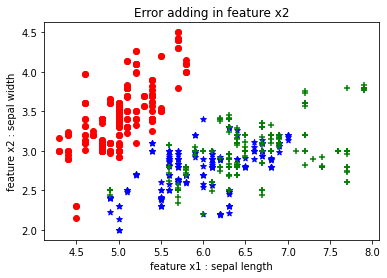

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x2 with bounded error0.3 : 0.975925925925926
BESVM Accuracy (on testing) = x2 with bounded error0.3 : 0.9851851851851852


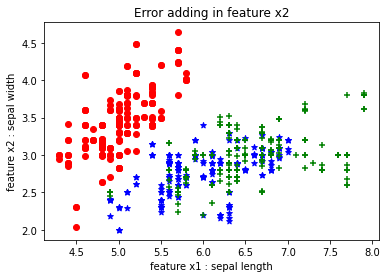

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

BESVM Accuracy (on training) = x2 with bounded error0.4 : 0.975925925925926
BESVM Accuracy (on testing) = x2 with bounded error0.4 : 0.9851851851851852


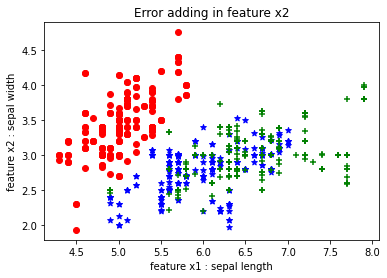

In [20]:
#add different error degree in feature x2
import matplotlib.pyplot as plot
box = [0.1,0.2,0.3,0.4]
df_BE = df_original_augmentation
subset = df_original_augmentation.sample(frac=0.5,replace=True,random_state=1)

x_original = df_original_augmentation.iloc[: , :-1].values
y_original = df_original_augmentation.iloc[:,-1].values
X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))

plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.scatter(x_original[y_original==2,0],x_original[y_original==2,1],color = 'g',marker = '+')
plt.title('Error adding in feature x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()
print('===============================================')

for i in box :
    for idx,cell in subset['x2'].iteritems():
        #r = rd.uniform(-0.3,0.3)
        for j in range(20) :
            r += rd.uniform(-(df_original_augmentation['x2'].mean()*i),df_original_augmentation['x2'].mean()*i)
        r =r/20
        subset['x2'][idx] += r
    df_BE = df_original_augmentation.append(subset,ignore_index=True)
    x_be = df_BE.iloc[:, :-1].values
    y_be = df_BE.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)   
    x_scatter = x_be[:,:2]


    print('BESVM Accuracy (on training) = x2 with bounded error'+str(i)+ ' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = x2 with bounded error'+str(i)+ ' : '+str(result_BE_test))
    plt.scatter(x_scatter[y_be==0,0],x_scatter[y_be==0,1],color = 'r',marker = 'o')
    plt.scatter(x_scatter[y_be==1,0],x_scatter[y_be==1,1],color = 'b',marker = '*')
    plt.scatter(x_scatter[y_be==2,0],x_scatter[y_be==2,1],color = 'g',marker = '+')
    plt.title('Error adding in feature x2')
    plt.xlabel('feature x1 : sepal length')
    plt.ylabel('feature x2 : sepal width')
    plt.show()
    print("==========================================")

